# Problem 3: Probabilities and Distributions

This notebook covers probability theory, conditional probabilities, and various probability distributions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Problem 1: Conditional Probability - Exam Performance

In [2]:
P_A = 0.90
P_B = 0.10
P_E_given_A = 0.80
P_E_given_B = 0.30

print("GIVEN INFORMATION:")
print(f"P(A) = {P_A} (students are well prepared)")
print(f"P(B) = {P_B} (students are not so well prepared)")
print(f"P(E|A) = {P_E_given_A} (well prepared student passes)")
print(f"P(E|B) = {P_E_given_B} (not so well prepared student passes)")

GIVEN INFORMATION:
P(A) = 0.9 (students are well prepared)
P(B) = 0.1 (students are not so well prepared)
P(E|A) = 0.8 (well prepared student passes)
P(E|B) = 0.3 (not so well prepared student passes)


### 1(a) $\mathbb{P}(E \cap A)$ - Probability of passing AND being well prepared

$$
\mathbb{P}(E \cap A) = \mathbb{P}(A) \cdot \mathbb{P}(E|A)
$$

In [3]:
P_E_and_A = P_A * P_E_given_A

print(f"\nAnswer: {P_E_and_A*100:.1f}% of students pass the exam AND are well prepared")


Answer: 72.0% of students pass the exam AND are well prepared


### 1(b) $\mathbb{P}(E)$ - Total probability of passing

$$
\mathbb{P}(E) = \mathbb{P}(E|A) \cdot \mathbb{P}(A) + \mathbb{P}(E|B) \cdot \mathbb{P}(B)
$$

In [4]:
P_E = P_A * P_E_given_A + P_B * P_E_given_B

print(f"\nAnswer: {P_E*100:.1f}% of all students pass the exam")


Answer: 75.0% of all students pass the exam


### 1(c) $\mathbb{P}(B|E)$ - Probability of being group B given passing

$$
\mathbb{P}(B|E) = \frac{\mathbb{P}(E|B) \cdot \mathbb{P}(B)}{\mathbb{P}(E)}
$$

In [5]:
P_E_and_B = P_B * P_E_given_B
P_B_given_E = P_E_and_B / P_E

print(f"\nAnswer: {P_B_given_E*100:.2f}% of students who passed were not so well prepared")


Answer: 4.00% of students who passed were not so well prepared


## Problem 2: Binomial Distribution - BBQ Vegetable Charring

In [6]:
n = 5
p = 0.60

print("GIVEN INFORMATION:")
print(f"Number of vegetable servings: n = {n}")
print(f"Probability of charring: p = {p}")
print(f"This is a Binomial distribution: X ~ Bin({n}, {p})")

GIVEN INFORMATION:
Number of vegetable servings: n = 5
Probability of charring: p = 0.6
This is a Binomial distribution: X ~ Bin(5, 0.6)


### 2(a) $\mathbb{P}(X = 0)$ - None charred

$$\mathbb{P}(X = 0) = \binom{5}{0} \times 0.6^0 \times 0.4^5 = 1 \times 1 \times 0.4^5$$

In [7]:
P_none = stats.binom.pmf(0, n, p)

print(f"P(X = 0) = {P_none:.6f}")

P(X = 0) = 0.010240


### 2(b) $\mathbb{P}(X = 2)$ - Exactly two charred

$$\mathbb{P}(X = 2) = \binom{5}{2} \times 0.6^2 \times 0.4^3$$

where $\binom{5}{2} = \frac{5!}{2!(5-2)!} = \frac{5 \times 4}{2 \times 1} = 10$

In [8]:
P_two = stats.binom.pmf(2, n, p)

print(f"P(X = 2) = {P_two:.6f}")

P(X = 2) = 0.230400


### 2(c) $\mathbb{P}(X \ge 3)$ - At least three charred

$$\mathbb{P}(X \geq 3) = \mathbb{P}(X=3) + \mathbb{P}(X=4) + \mathbb{P}(X=5)$$

Or using complement:

$$\mathbb{P}(X \geq 3) = 1 - \mathbb{P}(X \leq 2) = 1 - [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)]$$

In [9]:
P_at_least_3 = 1 - stats.binom.cdf(2, n, p)

print(f"P(X ≥ 3) = {P_at_least_3:.6f}")

P(X ≥ 3) = 0.682560


## Problem 3: Normal Distribution - Stock Returns

In [10]:
mu = 0.03
sigma_sq = 0.02
sigma = np.sqrt(sigma_sq)

print("GIVEN INFORMATION:")
print(f"Mean return: {mu} ({mu*100}%)")
print(f"Variance: {sigma_sq}")
print(f"Standard deviation: {sigma:.4f} ({sigma*100:.2f}%)")
print(f"\nDistribution: X ~ N({mu}, {sigma_sq})")

GIVEN INFORMATION:
Mean return: 0.03 (3.0%)
Variance: 0.02
Standard deviation: 0.1414 (14.14%)

Distribution: X ~ N(0.03, 0.02)


### 3(a) Probabilities for single stock return

i. $\mathbb{P}(X > 0.01)$

$$\mathbb{P}(X > 0.01) = 1 - \mathbb{P}(X \leq 0.01) = 1 - \Phi\left(\frac{0.01 - 0.03}{\sqrt{0.02}}\right)$$

where $\Phi$ is the standard normal CDF.

In [11]:
P_greater_001 = 1 - stats.norm.cdf(0.01, mu, sigma)

print(f"i. P(X > 0.01) = {P_greater_001:.6f}")

i. P(X > 0.01) = 0.556231


ii. $\mathbb{P}(X ≥ 0.01)$

For continuous distributions:
$$\mathbb{P}(X \geq 0.01) = \mathbb{P}(X > 0.01)$$

In [12]:
P_geq_001 = P_greater_001

print(f"ii. P(X ≥ 0.01) = {P_geq_001:.6f}")

ii. P(X ≥ 0.01) = 0.556231


iii. $\mathbb{P}(X < 0.01)$

$$\mathbb{P}(X < 0.01) = 1 - \mathbb{P}(X \geq 0.01)$$

In [13]:
P_less_001 = 1 - P_geq_001

print(f"iii. P(X < 0.01) = {P_less_001:.6f}")

iii. P(X < 0.01) = 0.443769


iv. $\mathbb{P}(0.01 < X < 0.03)$

$$\mathbb{P}(0.01 < X < 0.03) = \Phi\left(\frac{0.03 - 0.03}{\sqrt{0.02}}\right) - \Phi\left(\frac{0.01 - 0.03}{\sqrt{0.02}}\right)$$


In [14]:
P_between = stats.norm.cdf(0.03, mu, sigma) - stats.norm.cdf(0.01, mu, sigma)

print(f"iv. P(0.01 < X < 0.03) = {P_between:.6f} ({P_between*100:.2f}%)")

iv. P(0.01 < X < 0.03) = 0.056231 (5.62%)


### 3(b) Portfolio return distribution

**Portfolio composition:**
- Weight in stocks: $w_{stocks} = 0.40$
- Weight per stock: $w_i = \frac{0.40}{10} = 0.04$
- Weight in risk-free: $w_{rf} = 0.60$

**Portfolio return formula:**
$$R_p = w_{rf} \cdot r_f + \sum_{i=1}^{10} w_i \cdot X_i = 0.60 \times 0.01 + \frac{0.40}{10}\sum_{i=1}^{10} X_i$$

**Expected return:**
$$E[R_p] = w_{rf} \cdot r_f + w_{stocks} \cdot E[X] = 0.60 \times 0.01 + 0.40 \times 0.03$$

**Variance (assuming independence, $\rho = 0$):**
$$\text{Var}[R_p] = \text{Var}\left[\sum_{i=1}^{10} w_i X_i\right] = \sum_{i=1}^{10} w_i^2 \text{Var}[X_i] = 10 \times \left(\frac{0.40}{10}\right)^2 \times 0.02$$

$$\text{Var}[R_p] = \frac{(0.40)^2}{10} \times 0.02 = \frac{0.16 \times 0.02}{10}$$

**Distribution:**
$$R_p \sim N\left(E[R_p], \text{Var}[R_p]\right)$$

In [15]:
w_stocks = 0.40
w_risk_free = 0.60
r_f = 0.01
n_stocks = 10

R_portfolio_mean = w_stocks * mu + w_risk_free * r_f
R_portfolio_variance = (w_stocks / n_stocks)**2 * n_stocks * sigma_sq
R_portfolio_std = np.sqrt(R_portfolio_variance)


print(f"E[R_p] = {w_stocks} × {mu} + {w_risk_free} × {r_f}")
print(f"E[R_p] = {R_portfolio_mean:.6f} ({R_portfolio_mean*100:.4f}%)")
print(f"\nVar[R_p] = {R_portfolio_variance:.8f}")
print(f"Std[R_p] = {R_portfolio_std:.6f} ({R_portfolio_std*100:.4f}%)")
print(f"\nDistribution: R_p ~ N({R_portfolio_mean:.6f}, {R_portfolio_variance:.8f})")

E[R_p] = 0.4 × 0.03 + 0.6 × 0.01
E[R_p] = 0.018000 (1.8000%)

Var[R_p] = 0.00032000
Std[R_p] = 0.017889 (1.7889%)

Distribution: R_p ~ N(0.018000, 0.00032000)


### 3(c) Impact of correlation on portfolio variance

**General portfolio variance formula with correlation:**

For portfolio with weights $w_i$ and correlation $\rho$ between assets:

$$\text{Var}[R_p] = \sum_{i=1}^{n} w_i^2 \sigma^2 + \sum_{i=1}^{n}\sum_{j \neq i} w_i w_j \text{Cov}(X_i, X_j)$$

Since $\text{Cov}(X_i, X_j) = \rho \sigma^2$ for $i \neq j$:

$$\text{Var}[R_p] = \sum_{i=1}^{n} w_i^2 \sigma^2 + \sum_{i=1}^{n}\sum_{j \neq i} w_i w_j \rho \sigma^2$$

For equal weights $w_i = \frac{w_{stocks}}{n}$:

$$\text{Var}[R_p] = n \cdot w^2 \sigma^2 + n(n-1) \cdot w^2 \rho \sigma^2$$

$$\text{Var}[R_p] = w^2 \sigma^2 [n + n(n-1)\rho]$$

$$\text{Var}[R_p] = w^2 n \sigma^2 [1 + (n-1)\rho]$$

where $w = \frac{w_{stocks}}{n}$

**Key insights:**
- When $\rho = 0$: $\text{Var}[R_p] = w^2 n \sigma^2$ (diversification benefit)
- When $\rho = 1$: $\text{Var}[R_p] = w^2 n^2 \sigma^2 = (w_{stocks})^2 \sigma^2$ (no diversification)
- When $\rho < 0$: Variance decreases further (hedging)
- **Higher correlation** leads to **Higher portfolio risk**

In [16]:
w = w_stocks / n_stocks
var_rho_1 = w**2 * n_stocks**2 * sigma_sq
var_rho_neg05 = w**2 * n_stocks * sigma_sq * (1 + (n_stocks - 1) * (-0.5))

print(f"Effect of correlation:")
print(f"- p = 0:  Var[R_p] = {R_portfolio_variance:.8f}")
print(f"- p = 1:  Var[R_p] = {var_rho_1:.8f} (no diversification)")
print(f"- p = -0.5: Var[R_p] = {var_rho_neg05:.8f} (strong diversification)")
print(f"\nConclusion: Higher correlation reduces diversification benefits")

Effect of correlation:
- p = 0:  Var[R_p] = 0.00032000
- p = 1:  Var[R_p] = 0.00320000 (no diversification)
- p = -0.5: Var[R_p] = -0.00112000 (strong diversification)

Conclusion: Higher correlation reduces diversification benefits


## Problem 4: Tesla Stock Returns Analysis

In [17]:
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

print("Downloading Tesla stock data...")
tesla = yf.download('TSLA', start=start_date, end=end_date, interval='1wk', progress=False)

tesla['Simple_Return'] = (tesla['Close'] - tesla['Close'].shift(1)) / tesla['Close'].shift(1)
tesla['Log_Return'] = np.log(tesla['Close'] / tesla['Close'].shift(1))

returns = tesla['Simple_Return'].dropna()

print(f"\nData downloaded: {len(returns)} weekly returns")
print(f"Period: {returns.index[0].strftime('%Y-%m-%d')} to {returns.index[-1].strftime('%Y-%m-%d')}")


Data downloaded: 103 weekly returns
Period: 2023-11-13 to 2025-10-27


### 4(a) Empirical probability using descriptive statistics

In [18]:
P_below_minus2_empirical = (returns < -0.02).mean()
P_below_minus4_empirical = (returns < -0.04).mean()


print("Using empirical CDF (counting observations):")

print(f"\na) P(Return < -2%) = {P_below_minus2_empirical:.4f} ({P_below_minus2_empirical*100:.2f}%)")
print(f"   Number of weeks: {(returns < -0.02).sum()} out of {len(returns)}")

print(f"\nb) P(Return < -4%) = {P_below_minus4_empirical:.4f} ({P_below_minus4_empirical*100:.2f}%)")
print(f"   Number of weeks: {(returns < -0.04).sum()} out of {len(returns)}")

Using empirical CDF (counting observations):

a) P(Return < -2%) = 0.3592 (35.92%)
   Number of weeks: 37 out of 103

b) P(Return < -4%) = 0.2330 (23.30%)
   Number of weeks: 24 out of 103


### 4(b) Probability assuming normal distribution

In [19]:
mean_return = returns.mean()
std_return = returns.std()

P_below_minus2_normal = stats.norm.cdf(-0.02, mean_return, std_return)
P_below_minus4_normal = stats.norm.cdf(-0.04, mean_return, std_return)

print(f"Assuming N({mean_return:.6f}, {std_return ** 2:.6f})")

print(f"\na) P(Return < -2%) = {P_below_minus2_normal:.4f} ({P_below_minus2_normal*100:.2f}%)")
print(f"b) P(Return < -4%) = {P_below_minus4_normal:.4f} ({P_below_minus4_normal*100:.2f}%)")

Assuming N(0.010439, 0.006490)

a) P(Return < -2%) = 0.3528 (35.28%)
b) P(Return < -4%) = 0.2656 (26.56%)


### 4(c) Comparison and discussion

In [20]:
print(f"\nP(Return < -2%):")
print(f"  Empirical:  {P_below_minus2_empirical:.4f}")
print(f"  Normal:     {P_below_minus2_normal:.4f}")
print(f"  Difference: {abs(P_below_minus2_empirical - P_below_minus2_normal):.4f}")
print(f"\nP(Return < -4%):")
print(f"  Empirical:  {P_below_minus4_empirical:.4f}")
print(f"  Normal:     {P_below_minus4_normal:.4f}")
print(f"  Difference: {abs(P_below_minus4_empirical - P_below_minus4_normal):.4f}")


P(Return < -2%):
  Empirical:  0.3592
  Normal:     0.3528
  Difference: 0.0065

P(Return < -4%):
  Empirical:  0.2330
  Normal:     0.2656
  Difference: 0.0326


**Observations:**

1. **At -2% threshold:** Both methods give very similar results (difference < 0.5%)
2. **At -4% threshold:** Larger discrepancy - normal distribution overestimates tail probability by 3.33%
3. **Pattern:** Differences increase in the tails, suggesting the empirical distribution has thinner left tail than normal

---

**Pros and Cons:**

**EMPIRICAL METHOD (Descriptive Statistics):**

**PROS:**
- No distributional assumptions required
- Uses actual observed data directly
- Captures real market behavior including asymmetries
- Reflects actual tail behavior and fat tails

**CONS:**
- Limited to observed range of data
- Cannot extrapolate to extreme events not yet observed
- Requires large sample size for reliable estimates
- Sample-dependent - may not reflect future if market changes
- Provides discrete estimates only

---

**NORMAL DISTRIBUTION METHOD:**

**PROS:**
- Can estimate probabilities for any value (even extremes)
- Smooth, continuous estimates with theoretical foundation
- Works reasonably well with smaller samples
- Allows for analytical calculations and closed-form solutions
- Mathematically tractable for portfolio theory

**CONS:**
- Strong assumption: returns must be normally distributed
- Often underestimates tail risk (fat tails in reality)
- Ignores skewness and excess kurtosis
- Symmetric assumption may not hold (returns often negatively skewed)
- May severely underestimate probability of market crashes

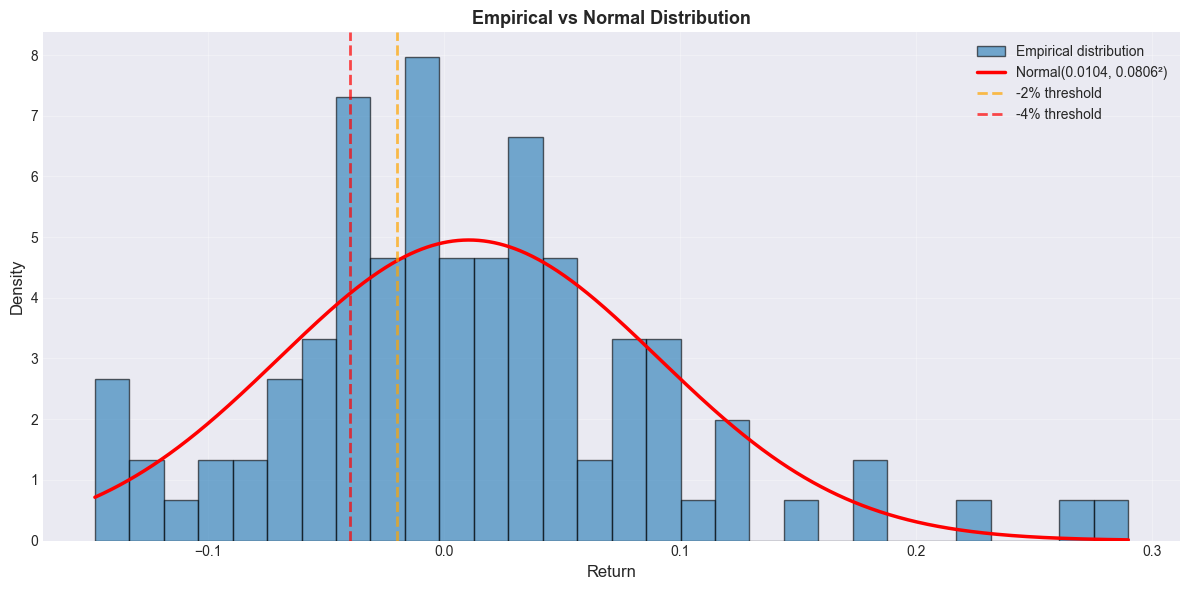

In [21]:
x = np.linspace(returns.min(), returns.max(), 1000)
normal_pdf = stats.norm.pdf(x, mean_return, std_return)

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(returns, bins=30, density=True, alpha=0.6, edgecolor='black', label='Empirical distribution')
ax.plot(x, normal_pdf, 'r-', linewidth=2.5, label=f'Normal({mean_return:.4f}, {std_return:.4f}²)')

ax.axvline(-0.02, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='-2% threshold')
ax.axvline(-0.04, color='red', linestyle='--', linewidth=2, alpha=0.7, label='-4% threshold')

ax.set_xlabel('Return', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Empirical vs Normal Distribution', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Problem 5: Binomial Asset Price Model

In [22]:
p_up = 0.55
p_down = 0.45
S0 = 10
r_up = 0.02
r_down = -0.01

print("GIVEN INFORMATION:")
print(f"Initial price: S(0) = ${S0}")
print(f"Probability of upward movement: p = {p_up}")
print(f"Probability of downward movement: 1-p = {p_down}")
print(f"Upward return: {r_up} ({r_up*100}%)")
print(f"Downward return: {r_down} ({r_down*100}%)")

GIVEN INFORMATION:
Initial price: S(0) = $10
Probability of upward movement: p = 0.55
Probability of downward movement: 1-p = 0.45
Upward return: 0.02 (2.0%)
Downward return: -0.01 (-1.0%)


### 5(a) Probability of price increases

**i. Five periods in a row**

$$\mathbb{P}(\text{5 ups in a row}) = p^5 = (0.55)^5$$

In [23]:
P_5_in_row = p_up ** 5

print(f"i. P(5 increases in a row) = {P_5_in_row:.6f}")

i. P(5 increases in a row) = 0.050328


**ii. Three periods in a row**

$$\mathbb{P}(\text{3 ups in a row}) = p^3 = (0.55)^3$$

In [24]:
P_3_in_row = p_up ** 3

print(f"ii. P(3 increases in a row) = {P_3_in_row:.6f}")

ii. P(3 increases in a row) = 0.166375


**iii. In three out of five periods**

This is a binomial probability with $n=5$ and $k=3$:

$$\mathbb{P}(X = 3) = \binom{5}{3} p^3 (1-p)^2 = \frac{5!}{3!2!} \times (0.55)^3 \times (0.45)^2$$

In [25]:
from math import comb

P_3_of_5 = stats.binom.pmf(3, 5, p_up)

print(f"iii. P(3 increases out of 5) = {P_3_of_5:.6f}")

iii. P(3 increases out of 5) = 0.336909


**iv. In 10 out of 15 periods**

This is a binomial probability with $n=15$ and $k=10$:

$$\mathbb{P}(X = 10) = \binom{15}{10} p^{10} (1-p)^5 = \frac{15!}{10!5!} \times (0.55)^{10} \times (0.45)^5$$

In [26]:
P_10_of_15 = stats.binom.pmf(10, 15, p_up)

print(f"iv. P(10 increases out of 15) = {P_10_of_15:.6f}")

iv. P(10 increases out of 15) = 0.140360


### 5(b) Expected return after two periods

**All possible outcomes after 2 periods:**

| Outcome | Path | Probability | Final Price |
|---------|------|-------------|-------------|
| UU | Up-Up | $p^2$ | $S(0)(1+r_u)^2$ |
| UD | Up-Down | $p(1-p)$ | $S(0)(1+r_u)(1+r_d)$ |
| DU | Down-Up | $(1-p)p$ | $S(0)(1+r_d)(1+r_u)$ |
| DD | Down-Down | $(1-p)^2$ | $S(0)(1+r_d)^2$ |

**Expected price:**
$$E[S(2)] = p^2 \cdot S(0)(1+r_u)^2 + 2p(1-p) \cdot S(0)(1+r_u)(1+r_d) + (1-p)^2 \cdot S(0)(1+r_d)^2$$

**Expected return:**
$$E[R] = \frac{E[S(2)] - S(0)}{S(0)}$$

In [27]:
P_UU = p_up ** 2
P_UD = p_up * p_down
P_DU = p_down * p_up
P_DD = p_down ** 2

S_UU = S0 * (1 + r_up) ** 2
S_UD = S0 * (1 + r_up) * (1 + r_down)
S_DU = S0 * (1 + r_down) * (1 + r_up)
S_DD = S0 * (1 + r_down) ** 2

E_S2 = P_UU * S_UU + P_UD * S_UD + P_DU * S_DU + P_DD * S_DD
E_return = (E_S2 - S0) / S0


print(f"Expected price: E[S(2)] = ${E_S2:.4f}")
print(f"Expected return: E[R] = {E_return:.6f}")

Expected price: E[S(2)] = $10.1304
Expected return: E[R] = 0.013042


## Problem 6: Probabilities for Different Distributions

### Distribution CDFs

#### 1. Standard Normal Distribution: $N(0,1)$

$$F(x) = \Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt$$



#### 2. Student's t-Distribution with 2 df: $t_2$

$$F(x) = \frac{1}{2} + \frac{x}{2\sqrt{2}\sqrt{1 + \frac{x^2}{2}}}$$



#### 3. Exponential Distribution: $Exp(1)$

$$F(x) = \begin{cases}
1 - e^{-x} & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}$$



#### 4. Chi-Square Distribution with 4 df: $\chi^2_4$

$$F(x) = \begin{cases}
\frac{\gamma(2, \frac{x}{2})}{\Gamma(2)} = 1 - e^{-\frac{x}{2}} \left(1 + \frac{x}{2}\right) & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}$$

---

### General Formulas

**(a) $\mathbb{P}(1 < X < 1.5)$**
$$\mathbb{P}(1 < X < 1.5) = F(1.5) - F(1)$$

**(b) $\mathbb{P}(1 \leq X < 1.5)$**
$$\mathbb{P}(1 \leq X < 1.5) = F(1.5^-) - F(1)$$

For continuous distributions: $\mathbb{P}(1 \leq X < 1.5) = \mathbb{P}(1 < X < 1.5)$

**(c) $\mathbb{P}(1 < X)$ or $\mathbb{P}(X > 1)$**
$$\mathbb{P}(X > 1) = 1 - F(1)$$

**(d) $\mathbb{P}(X < 1.5)$**
$$\mathbb{P}(X < 1.5) = F(1.5)$$

**(e) $\mathbb{P}(X = 1.5)$**

For continuous distributions: $\mathbb{P}(X = c) = 0$ for any constant $c$

---

In [28]:
distributions = {
    'N(0,1)': stats.norm(0, 1),
    't₂': stats.t(2),
    'Exp(1)': stats.expon(scale=1),
    'χ²₄': stats.chi2(4)
}

results_6 = []

for name, dist in distributions.items():
    a = dist.cdf(1.5) - dist.cdf(1)
    b = dist.cdf(1.5) - dist.cdf(1)
    c = 1 - dist.cdf(1)
    d = dist.cdf(1.5)
    e = 0.0
    
    results_6.append({
        'Distribution': name,
        'P(1<X<1.5)': a,
        'P(1≤X<1.5)': b,
        'P(1<X)': c,
        'P(X<1.5)': d,
        'P(X=1.5)': e
    })

results_6_df = pd.DataFrame(results_6)
print(results_6_df.to_string(index=False))

Distribution  P(1<X<1.5)  P(1≤X<1.5)   P(1<X)  P(X<1.5)  P(X=1.5)
      N(0,1)    0.091848    0.091848 0.158655  0.933193       0.0
          t₂    0.075128    0.075128 0.211325  0.863803       0.0
      Exp(1)    0.144749    0.144749 0.367879  0.776870       0.0
         χ²₄    0.083155    0.083155 0.909796  0.173359       0.0
